In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
from random import expovariate
import pandas as pd
import seaborn as sns



0.00376

(array([99586.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   414.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

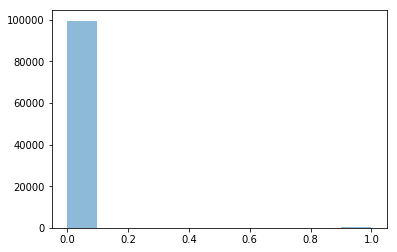

In [2]:
n, p = 1, a  # number of trials, probability of each trial
s = np.random.binomial(n, p, 100000)


dataset = pd.DataFrame(s)
plt.hist(s, alpha=0.5)

In [32]:
n = 1  # number of trials
sum_of_male_cases = []


# Probabilities and intervals from CancerResearchUK
labels = ['0-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39','40-44','45-49']
male_interval = [0.0043,0.00259,0.00227,0.00418,0.00696,0.01086,0.01401,0.01666,0.0271,0.0488]#probability each age interval


# Simulate cancer tests in sample population
male_distribution = []
for i in male_interval:
    p = i
    male_distribution = np.random.binomial(n, p, 100000) #cases per interval using binomial distribution with probabilites from from cancerresearchuk
    sum_of_male_cases.append(male_distribution.sum()) # each age group is tested for cancer and random positives are chosen from the population based on numbers from canceruk.
print(sum_of_male_cases)





[392, 275, 231, 429, 685, 1069, 1447, 1577, 2795, 4914]


In [36]:
sum_of_female_cases = []

female_interval = [0.0037,0.00183,0.00205,0.004,0.00787,0.01682,0.02426,0.03293,0.05755,0.09781]


female_distribution = []
for i in female_interval:
    p = i
    female_distribution = np.random.binomial(n, p, 100000) #cases per interval using binomial distribution with probabilites from from cancerresearchuk
    sum_of_female_cases.append(female_distribution.sum()) # each age group is tested for cancer and random positives are chosen from the population based on numbers from canceruk.
print(sum_of_female_cases)


[390, 184, 220, 393, 781, 1630, 2389, 3300, 5755, 9627]


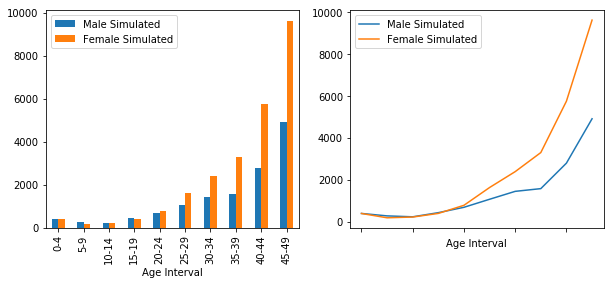

In [42]:
# Create Pandas Dataframe from simulation results
labels = ['0-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39','40-44','45-49']
myframe = pd.DataFrame(sum_of_male_cases, columns=['Male Simulated'])
myframe['Age Interval'] = labels #created new column in dataframe for interval labels
myframe['Female Simulated'] = sum_of_female_cases
myframe.set_index("Age Interval",drop=True,inplace=True)#used Pandas set index method to set col as index
myframe['Actual Male Cases'] = [430, 259, 227,418,696,1086,1401,1666,2710,4880]
myframe['Actual Female Cases'] = [370,183,205,400,787,1682,2426,3293, 5755,9781]

# Plot results of Binomial Distribution
fig=plt.figure(figsize=(10,4))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

myframe[['Male Simulated','Female Simulated']].plot(kind='bar',ax=ax1)
#line plot is better visualisation
myframe[['Male Simulated','Female Simulated']].plot(kind='line',ax=ax2)

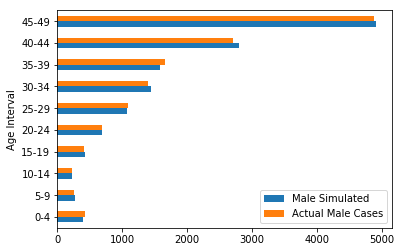

In [46]:
myframe[['Male Simulated','Actual Male Cases']].plot(kind='barh')

In [7]:
myframe

,Male Simulated,Female Simulated,Actual Male Cases,Actual Female Cases
Age Interval,,,,
0-4,433,373,430,370
5-9,250,190,259,183
10-14,263,190,227,205
15-19,395,399,418,400
20-24,708,810,696,787
25-29,1099,1734,1086,1682
30-34,1384,2427,1401,2426
35-39,1686,3342,1666,3293


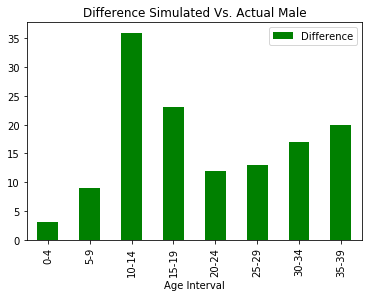

In [8]:
Difference = myframe['Male Simulated']-myframe['Actual Male Cases']
myframe['Difference'] = Difference.abs()

myframe[['Difference']].plot(kind='bar',color='g',title='Difference Simulated Vs. Actual Male')

In [10]:
Cancer_by_age = pd.DataFrame(columns=['Age','Total Cases','Type','Number'])
Cancer_by_age['Age'] = labels
Cancer_by_age['Total Cases'] = myframe['Male Simulated'].values + myframe['Female Simulated'].values
Cancer_by_age



Age_inter_2_M = [('Leukaemias'),('Brain'), ('Lymphomas'),('Soft tissue sarcoma'),('SNS'),('Other cancers')]#Important
type_inter_2_M = np.random.choice(Age_inter_2_M, 916, p=[.31,.26,.13,.07,.05,.18])#Simulated occurence of types of cancer from CancerResearchUK(0-14 yrs)


In [11]:
Cancer_by_age

,Age,Total Cases,Type,Number
0,0-4,806,NaN,NaN
1,5-9,440,NaN,NaN
2,10-14,453,NaN,NaN
3,15-19,794,NaN,NaN
4,20-24,1518,NaN,NaN
5,25-29,2833,NaN,NaN
6,30-34,3811,NaN,NaN
7,35-39,5028,NaN,NaN


In [15]:
type_inter_2_M = list(type_inter_2_M)

summary_inter_2 = [type_inter_2_M.count(item) for item in Age_inter_2_M]

Common_cancer_M = []
for item in Age_inter_2_M:
    Common_cancer_M.append(type_inter_2_M.count(item))
print(Common_cancer_M)




[267, 244, 120, 66, 42, 177]


In [17]:
Age_inter_2_F = ['Leukaemias', 'Brain','Lymphomas','Renal','Soft tissue sarcoma','Other cancers']

#Important
type_inter_2_F = np.random.choice(Age_inter_2_F, 700, p=[.29,.28,.07,.06,.06,.24])
#Simulated occurence of types of cancer from CancerResearchUK(0-14 yrs)

type_inter_2_F = list(type_inter_2_F)

Common_cancer_F = []
for item in Age_inter_2_F:
    Common_cancer_F.append(type_inter_2_F.count(item))
print(Common_cancer_F)

[216, 202, 53, 40, 36, 153]


In [51]:
a = pd.DataFrame(Common_cancer_M, index=Age_inter_2_M, columns=['Most Common in Males'])#simulated cancer types in males (0-14)
b = pd.DataFrame(Common_cancer_F, index=Age_inter_2_F, columns=['Most Common in Females'])#simulated cancer types in females (0-14)

top_5 = pd.concat([a,b], axis=1, sort=True) #[5]

top_5

,Most Common in Males,Most Common in Females
Brain,244.0,202.0
Leukaemias,267.0,216.0
Lymphomas,120.0,53.0
Other cancers,177.0,153.0
Renal,NaN,40.0
SNS,42.0,NaN
Soft tissue sarcoma,66.0,36.0


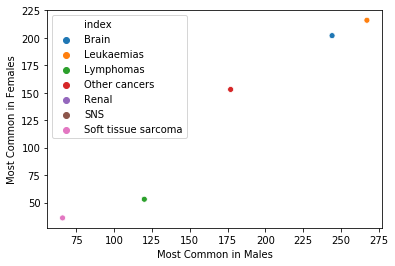

In [70]:
top_5 = top_5.reset_index()


ax = sns.scatterplot(x="Most Common in Males", y="Most Common in Females",hue="index", data=top_5)


In [ ]:
summary_inter_2

In [ ]:
new


In [ ]:
dataset.describe()

In [ ]:
dataset.sum() #average incidence rate of cancer 

In [ ]:
year = 0
results = []

for year in range(1,80):
    year = int(expovariate(1/59)) #cases per year using exponential distribution with mean no. of cases from cancerresearchuk
    print(year)
    results.append(year)
   
    
np.array(results)



plt.show()

my_df = pd.DataFrame(results)

plt.plot(x=my_df.index.values,y=my_df)


https://www.cancerresearchuk.org/health-professional/cancer-statistics/incidence/age#heading-Zero
https://stackoverflow.com/questions/1155539/how-do-i-generate-a-poisson-process/10250877#10250877
https://stackoverflow.com/questions/45747589/copying-a-column-from-one-dataframe-to-another-gives-nan-values

https://www.dataquest.io/blog/adding-axis-labels-to-plots-with-pandas-and-matplotlib/
https://stackoverflow.com/questions/28135436/concatenate-rows-of-two-dataframes-in-pandas

In [ ]:
my_df

In [ ]:
myframe




In [ ]:
test = np.random.binomial(100000, .3, 1)

In [ ]:
print(len(test))

In [ ]:
myframe
